## 🚗 Araç Fiyat Tahmin Projesi

Bu projede, ikinci el araçlara ait teknik ve görsel özellikleri kullanarak satış fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştirilmiştir. 

Proje sürecinde veri analizi, eksik değerlerin giderilmesi, görselleştirme ve özellik mühendisliği gibi temel adımlar gerçekleştirilmiştir. Kategorik veriler sayısallaştırılmış, sayısal veriler ise ölçeklendirilmiştir. Model olarak `RandomForestRegressor` seçilmiş ve performansı `R² skoru` ile değerlendirilmiştir. Ek olarak, `GridSearchCV` ile hiperparametre optimizasyonu yapılmıştır.

Elde edilen sonuçlar, modelin araç fiyatlarını yüksek doğrulukla tahmin edebildiğini göstermektedir.

Bu sürece ek olarak, veri seti üzerinde gözetimsiz öğrenme tekniği olan `KMeans Clustering` uygulanmıştır. Amaç, etiketlenmemiş verilerde benzer özelliklere sahip araçları gruplandırmak ve veri içindeki yapısal desenleri ortaya çıkarmaktır. 

Kümeleme sürecinde:
- Özellikler `StandardScaler` ile ölçeklenmiş,
- En uygun küme sayısı `Elbow yöntemi` ile belirlenmiş,
- `n_clusters=4` kullanılarak model eğitilmiştir.

Küme kalitesi `inertia` metriği ile değerlendirilmiş ve kümelerin ayrışma düzeyi `PCA` ile görselleştirilmiştir. Böylece her bir grubun, araçların yıl, kilometre, donanım gibi kriterlere göre nasıl bir araya geldiği analiz edilmiştir.

KMeans modeli bu projeye, yalnızca fiyat tahmini değil; aynı zamanda araçları segmentlere ayırarak **pazarlama, müşteri hedefleme veya fiyatlandırma stratejileri** açısından derinlemesine analiz imkanı sağlamıştır.


## Analysis Content
1. [Python Kütüphaneleri](#1)
1. [Veri İçeriği](#2)
1. [Veri Okuma ve analizi](#3)
1. [Eksik Değer Analizi](#4)
1. [Sütunlardaki Eksik Değerleri İşleme](#5)
1. [Tekrarlanan sütünlar varmı](#6)
1. [Verileri Görselleştirme](#7)
1. [Makine öğrenmesi Modeli](#8)
1. [Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi](#9)
1. [Label Encoding](#10)
1. [Ölçeklendirme](#11)
1. [Eğitim ve Test Verisi Ayrımı](#12)
1. [Random Forest Regressor Modelinin Oluşturulması ve Eğitilmesi](#13)
1. [Modelin Performansını Değerlendirme](#14)
1. [Sonuçlar ve İyileştirme](#15)
1. [Gözetimsiz Öğrenme: KMeans](#16)
1. [KMeans Modelinin Eğitilmesi ](#17)
1. [Küme Etiketlerinin Atanması](#18)
2. [Küme Etiketlerini Veriye Ekleme](#19)
3. [Kümelerin Özelliklerine Göre İncelenmesi](#20)
4. [PCA ile Boyut İndirgeme ve Görselleştirme](#21)
5. [KMeans Model Skoru](#22)
6. [Elbow Yöntemi ile En Uygun Küme Sayısının Belirlenmesi](#23)
7. [Proje Sonuçları ve Genel Değerlendirme](#24)

<a id="1"></a>
## Python Kütüphaneleri
* Bu bölümde kullanacağımız kütüphaneleri yüklüyoruz.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

<a id="2"></a>
## Veri İçeriği
* year:Aracın üretim yılı.
* make:Aracın markası veya üreticisi.
* model:Aracın özel modeli.
* trim:Araç modeli için ek tanımlama.
* body:Aracın kasa tipi (örneğin SUV, Sedan).
* transmission:Araçtaki şanzıman türü (örneğin otomatik).
* vin:Araç Tanımlama Numarası, her araç için benzersiz bir koddur.
* state:Aracın kayıtlı olduğu eyalet.
* condition:Aracın durumu, muhtemelen bir ölçekte değerlendirilebilir.
* odometer:Aracın kat ettiği kilometre veya mesafe.
* color:Aracın dış rengi.
* interior:Aracın iç rengi.
* seller:Aracı satan kuruluş.
* mmr:Manheim Piyasa Raporu, muhtemelen aracın tahmini piyasa değerini gösteriyor.
* sellingprice:Aracın satıldığı fiyat.
* saledate:Aracın satıldığı tarih ve saat.

<a id="3"></a>
## Veri Okuma ve analizi
* Bu bölümde /kaggle/input/vehicle-sales-data/car_prices.csv okuyoruz

In [2]:
df=pd.read_csv("car_prices.csv")


In [3]:
#verideki ilk beş kayıt gösterimi
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
#verilerin temel istatiklerini tanımlıyoruz
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Bu özet, veri setindeki araçların year, condition, mmr ve sellingprice sütünlarını genel olarak anlamamıza yardımcı olur. Ancak uç değerlerin varlığı, veri temizliği ve analiz sırasında dikkat edilmesi gereken bir faktör.

In [5]:
# veri setimizde bilgi çıkarımı
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


<a id=4></a>
## Eksik Değer Analizi
* Bu ksımda veri setimizin sütün veya satırlarında boş alanlar valsa bunları görmeye çalışacağız çünkü modelimizi eğittiğimizde eksik değerler varsa modelimiz hatalı yada yanlış sonuçlar üretebilir
   

In [6]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

<a id="5"><a>
## Sütunlardaki Eksik Değerleri İşleme

Araç markasını temsil eden `make` gibi kategorik sütunlarda çok sayıda eksik (null) değer bulunduğunda, bu verileri doldurmak dikkatli bir yaklaşım gerektirir. Eksik değerleri doğrudan en sık geçen kategoriyle doldurmak, veride önyargıya neden olabilir.

Bu nedenle, farklı doldurma (imputation) stratejileri uyguluyoruz:

* `make`, `model`, `trim`, `color` gibi kategorik sütunlardaki eksik değerleri `"Other"` (Diğer) etiketiyle dolduruyoruz. Bu, eksik verileri korurken modelin öğrenmesini engellemez

* 'body', 'transmission', 'interior' gibi kategorik sütunlarda eksik değerleri o sütunun mmode (en sık kullanılan değeri) ile doldurabiliriz

* 'vin' ve 'saledat' bazı sütunlar kritik veri içerdiği için, bu sütunlardaki eksik değerlerin bulunduğu satırları tamamen kaldırabilriz.

* 'condition', 'odometer', 'mmr' gibi sütünlar sayısal veri içerdiğinden mean (otalama değer) ataması yapabiliriz.




In [7]:
# kategorik değişkenlerimizde NAN değerlere Other (Diğer) atamsı yapıyorz
df['make'] = df['make'].fillna('Other')
df['model'] = df['model'].fillna('Other')
df['trim'] = df['trim'].fillna('Other')
df['color'] = df['color'].fillna('Other')

#kategorik sütunlarda eksik değerleri o sütunun modu (en sık görülen değeri) ile dolduruyoruz.
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

# Sayısal değişkenlerimize mean (ortalama) ataması yapıyoruz
df["condition"] = df["condition"].fillna(df["condition"].mean())
df["odometer"] = df["odometer"].fillna(df["odometer"].mean())
df["mmr"] = df["mmr"].fillna(df["mmr"].mean())

# Modelimizi etkilemediğinden vin ve saledate verilerimiz kaldırıyoruz
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)

In [8]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Nan veya boş verilerimizi doldurduk

<a id="6"></a>
## Tekrarlanan sütünlar varmı
* Veri setimizde birbiri aynı sütünlar var olup olmadığını kontrol ediyoruz.
*  var ise bunları veri setimizden çıkartıyoruz

In [9]:
df.duplicated().sum()

0

Göründüğü gibi birbirini Yenileyen verilerimiz yok

<a id="7"></a>
## Verileri Göreselleştirme
* Veri görselleştirme, ham verileri grafikler, tablolar ve görsel öğelerle sunarak bilgileri daha anlaşılır ve yorumlanabilir hale getiren çok önemli bir analiz aracıdır.


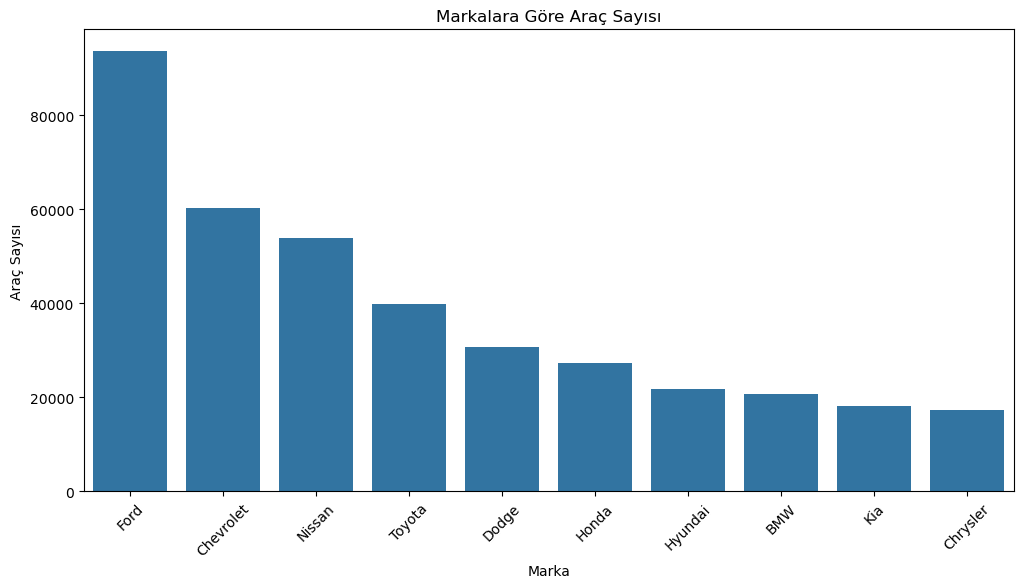

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x="make", data=df, order=df["make"].value_counts().index[:10])  # İlk 10 markayı gösterir
plt.xticks(rotation=45)
plt.title("Markalara Göre Araç Sayısı")
plt.xlabel("Marka")
plt.ylabel("Araç Sayısı")
plt.show()

Grafiktende anlaşılacağı gibi en çok satan model ford chevrolet nissan sıralamasıyla devam eder

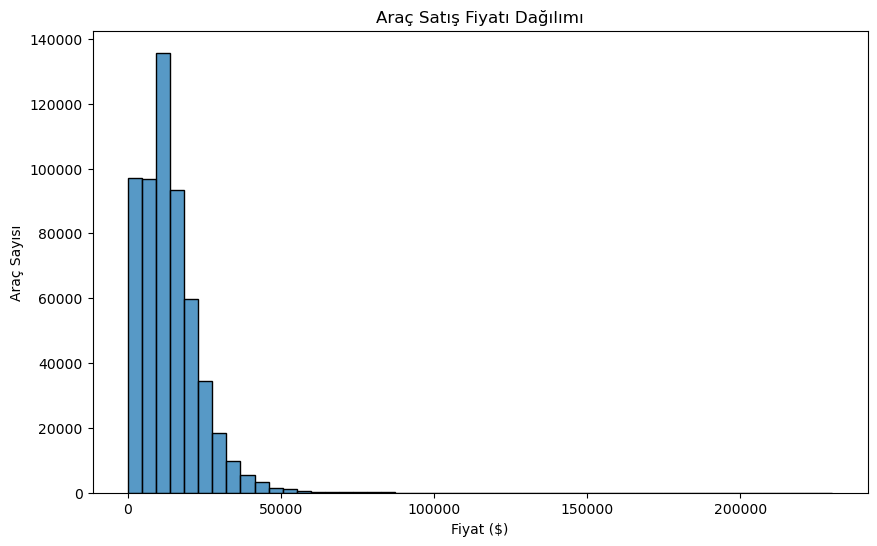

In [11]:
#Araç Fiyatlarının Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df["sellingprice"], bins=50)
plt.title("Araç Satış Fiyatı Dağılımı")
plt.xlabel("Fiyat ($)")
plt.ylabel("Araç Sayısı")
plt.show()

Araç satış fiyat dağılımında en çok satan fiyatlar genellikle 0 ile 50000 aralığındadır

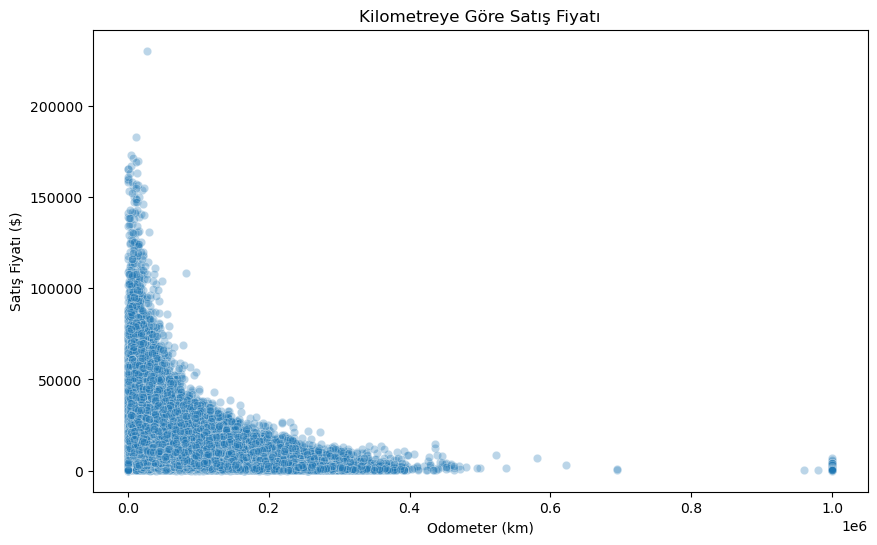

In [12]:
#Odometer vs. Fiyat Scatter Plot (Kilometre & Fiyat İlişkisi)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="odometer", y="sellingprice", data=df, alpha=0.3)
plt.title("Kilometreye Göre Satış Fiyatı")
plt.xlabel("Odometer (km)")
plt.ylabel("Satış Fiyatı ($)")
plt.show()


Grafiğimze baktığımızda kilometre arttıkça fiyat azalıyor yani fiyat ile kilometre ters orantılı

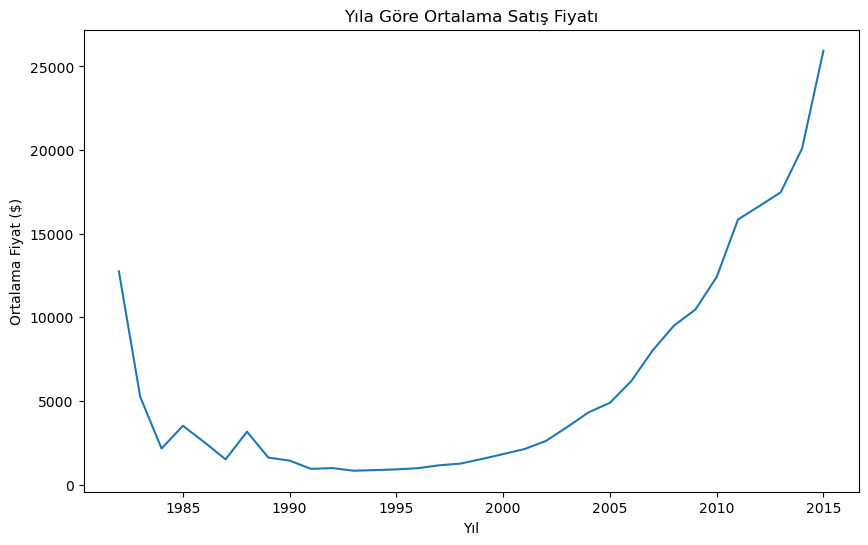

In [13]:
#Yıla Göre Ortalama Fiyat
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby("year")["sellingprice"].mean())
plt.title("Yıla Göre Ortalama Satış Fiyatı")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Fiyat ($)")
plt.show()


Bu görselde 1985 öncesi bazı araçların fiyatlarının yüksek oldupu görünüyor bu nedenle burayı bir inceleyelim

In [14]:
df.groupby("year")["sellingprice"].mean()

year
1982    12750.000000
1983     5250.000000
1984     2160.000000
1985     3520.000000
1986     2538.636364
1987     1512.500000
1988     3168.181818
1989     1620.000000
1990     1435.714286
1991      943.656716
1992      991.666667
1993      833.902439
1994      870.599490
1995      913.292546
1996      985.781434
1997     1157.454722
1998     1261.719404
1999     1533.696105
2000     1827.834130
2001     2131.014224
2002     2611.709315
2003     3447.268654
2004     4321.474455
2005     4893.989857
2006     6190.204808
2007     8021.969687
2008     9508.054092
2009    10462.313295
2010    12412.453313
2011    15851.677185
2012    16653.749836
2013    17476.602700
2014    20090.200535
2015    25937.304145
Name: sellingprice, dtype: float64

Yukarda baktığımızda 1982 model araçların fiyatları daha yüksek bu durum öğrenmemizde olmsuz bir etki yatarız bu yüzden 1982 yılında ait verileri silebiliriz 

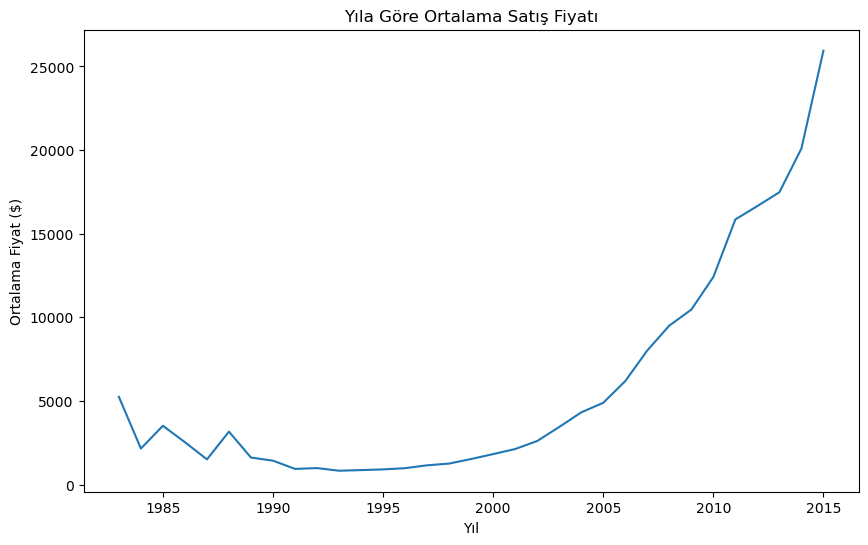

In [15]:
df = df[df["year"] != 1982] #1982 yılına ait verileri siliyoruz

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby("year")["sellingprice"].mean())
plt.title("Yıla Göre Ortalama Satış Fiyatı")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Fiyat ($)")
plt.show()

Şimdi grafiğimze baktığımızda yıl ile fiyat arasında hemen hemen doğru bir ilişki olduğunu görebiliyoruz

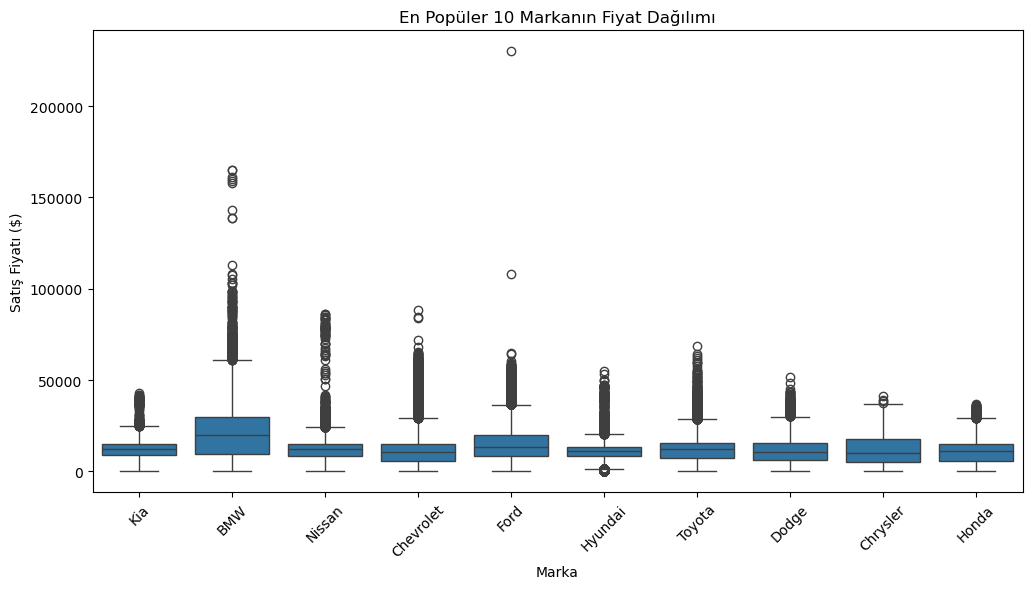

In [16]:
# En popüler 10 markayı al
top_10_makes = df['make'].value_counts().head(10).index

# Sadece bu markalara ait veriyi filtrele
df_top_10 = df[df['make'].isin(top_10_makes)]

# Boxplot çizimi
plt.figure(figsize=(12, 6))
sns.boxplot(x="make", y="sellingprice", data=df_top_10)
plt.xticks(rotation=45)
plt.title("En Popüler 10 Markanın Fiyat Dağılımı")
plt.xlabel("Marka")
plt.ylabel("Satış Fiyatı ($)")
plt.show()

<a id="8"></a>
# Makine öğrenmesi Modeli

## Random Forest Regressor Nedir?
Random Forest Regressor, çok sayıda karar ağaçlarından (decision trees) oluşan bir topluluk modelidir. Her bir karar ağacı, bağımsız değişkenlerin bir alt kümesine dayalı olarak tahminlerde bulunur ve modelin son tahmini, tüm ağaçların tahminlerinin ortalamasıdır. Bu yöntem, genellikle doğrusal olmayan veri setlerinde güçlü tahmin performansı gösterir.

## Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi
Öncelikle veri setimizde tüm kolonları alamayız.Bunun sebebi bazı kolonlar araç fiyatlarını etkilemez 
örnek: vin sütünü bilgileri aracın kimliğini belirler bu nedenle herhangi bir fiyatta değişiklik olup olmamasını etkilemez. Bu nedenle araç fiyatlarını etkileyecek sütunları alırız.

##### Bağımsız değişken: araç fiyatlarını belirleyen özellikleridr
##### Bağımlı değişken: Bağımsız değişkenele bağlı özelliktir

In [17]:
df_new=df[["year","make","model","body","transmission","odometer","color","interior","sellingprice"]]

Y=df_new["sellingprice"]
X=df_new.drop("sellingprice",axis=1)

<a id="10"></a>
## Label Encoding
Label Encoding, kategorik verilerin sayısal verilere dönüştürülmesidir. Bu işlem, modelin kategorik değişkenleri anlaması için gereklidir. LabelEncoder kullanılarak her kategorik sınıf sayısal bir değere dönüştürülür.

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ["make", "model", "body", "transmission", "color", "interior"]

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

<a id="11"></a>
## Ölçeklendirme
Ölçeklendirme, özellikle mesafe tabanlı algoritmalar kullanıldığında önemlidir. Çünkü bazı değişkenler, diğerlerinden çok daha büyük değerlere sahip olabilir, bu da modelin performansını etkileyebilir.
* Standardization (Z-Score Scaling): Verinin ortalamasını 0, standart sapmasını ise 1 yapar.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<a id="12"></a>
## Eğitim ve Test Verisi Ayrımı
Veriyi eğitim ve test olarak ayırmamız gerekiyor. Bunu train_test_split fonksiyonu ile yapabiliriz.

In [20]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


<a id="13"></a>
## Random Forest Regressor Modelinin Oluşturulması ve Eğitilmesi

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Modeli oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

<a id="14"></a>
## Modelin Performansını Değerlendirme
Eğittiğimiz modeli test seti üzerinde değerlendirebiliriz. Modelin başarı oranını R^2 skoru ve mean squared error (MSE) gibi metriklerle değerlendireceğiz.

R^2 Skoru:
R² skoru, modelin ne kadar iyi olduğunu gösterir. 1'e yakın bir değer, mükemmel bir model olduğunu gösterirken, 0'a yakın bir değer, modelin veriyi iyi öğrenemediğini gösterir.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Test seti üzerinde tahminler
y_pred = rf_model.predict(X_test)

# R^2 Skoru
r2 = r2_score(y_test, y_pred)
print(f"R^2 Skoru: {r2}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


R^2 Skoru: 0.9143235551616812
Mean Squared Error (MSE): 8149058.7140234625


Modelinizin R² skoru 0.914, yani %91.4 oranında başarıyla satış fiyatlarını tahmin edebiliyor. MSE değeri ise 8,149,058.71, bu da modelin tahminlerinin genel olarak doğru olduğunu gösteriyor. Modeliniz oldukça başarılı görünüyor, ancak daha iyi sonuçlar için hiperparametre optimizasyonu ve farklı algoritmalar deneyebilirsiniz.

<a id="15"></a>
## Sonuçlar ve İyileştirme
Eğer modeliniz tatmin edici değilse, aşağıdaki adımları deneyebilirsiniz:

Daha fazla ağaç (n_estimators) kullanmak.

Daha derin ağaçlar oluşturmak için max_depth parametresini ayarlamak.

Modelin hiperparametrelerini GridSearchCV veya RandomizedSearchCV ile optimize etmek.

In [23]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
} 

# GridSearchCV ile modelin parametrelerini optimize etme
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print(f"En iyi parametreler: {grid_search.best_params_}")


Fitting 2 folds for each of 8 candidates, totalling 16 fits
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


GridSearchCV Sonuç Özeti

GridSearchCV ile yapılan hiperparametre aramasında toplam **8 farklı parametre kombinasyonu**, her biri **2 fold’lu çapraz doğrulama** ile değerlendirilmiştir. Böylece toplam **16 farklı model eğitimi** gerçekleştirilmiştir. Bu sistematik arama süreci sonunda en iyi performansı veren parametre kombinasyonu:


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

<a id="16"></a>
# Gözetimsiz Öğrenme: KMeans
* Tanım
KMeans, verileri önceden belirlenmiş sayıda kümeye (cluster) ayıran bir gözetimsiz öğrenme algoritmasıdır. Etiketli veri gerektirmez. Her veri noktası, en yakın merkez noktasına (centroid) göre bir kümeye atanır.

* Kullanım Amacı
Bu projede KMeans, sellingprice gibi bir hedef değişken kullanılmadan, araçları benzer özelliklerine göre gruplandırmak (segmentasyon) amacıyla kullanılacaktır.

<a id="17"></a>
## KMeans Modelinin Eğitilmesi 

In [24]:
from sklearn.cluster import KMeans

# 4 kümeli KMeans modeli tanımlanıyor
kmeans = KMeans(n_clusters=4, random_state=42)

# Model X_train verisiyle eğitiliyor
kmeans.fit(X_train)

C:\Users\omer_\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\omer_\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\omer_\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omer_\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\omer_\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

KMeans(n_clusters=4, random_state=42)

fit(X_train) komutu ile model sadece eğitim verisi üzerinde öğrenme yapar.

Bu işlem sonucunda KMeans her bir küme için merkez noktaları (centroid) oluşturur.

Şu anda herhangi bir veri noktası henüz etiketlenmemiştir.

<a id="18"></a>
## Küme Etiketlerinin Atanması

In [25]:
# Eğitim verisinin kümeleri
train_clusters = kmeans.predict(X_train)

# Test verisinin kümeleri
test_clusters = kmeans.predict(X_test)

predict() fonksiyonu, verilen veri noktasının hangi kümeye ait olduğunu belirler.

train_clusters ve test_clusters değişkenleri, her satırın ait olduğu küme numarasını içerir (0, 1, 2, 3).

<a id="19"></a>
## Küme Etiketlerini Veriye Ekleme

In [26]:
# Eğitim ve test kümelerini DataFrame'e çevir
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Küme etiketlerini ekle
X_train_df["cluster"] = train_clusters
X_test_df["cluster"] = test_clusters

X_train_df ve X_test_df artık her satır için ait olduğu küme bilgisine sahiptir.

Bu yapılar, her kümenin yapısını incelemek ya da görselleştirme yapmak için kullanılabilir.

<a id="20"></a>
## Kümelerin Özelliklerine Göre İncelenmesi

In [27]:
# Kümelerin ortalama özelliklerini hesapla (eğitim verisi üzerinden)
cluster_summary = X_train_df.groupby("cluster").mean()
cluster_summary


,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,0.177091,0.028314,-0.022517,2.105325,-0.179876,-0.109827,-0.004595,-0.074249
1,-0.075409,-0.005226,-0.002116,-0.363931,-0.180143,0.043968,-0.887288,0.001116
2,-0.481281,0.243305,0.087068,-0.343522,5.549105,0.165791,-0.109522,-0.098295
3,0.055556,-0.024549,0.000858,-0.369938,-0.179876,-0.020668,0.992606,0.035872


Bu tabloda her bir kümenin ortalama özellik değerleri yer almaktadır. Bu sayede kümelerin neye göre ayrıldığını görebiliriz.

Küme	Açıklama (Yorumlanabilir örnekler)
Cluster 0	Özellikle 3. sütundaki yüksek değer (yaklaşık 2.1) bu kümeye ait araçların diğerlerine göre bir özelliği belirgin şekilde taşıdığını gösteriyor olabilir (örneğin 'body' tipi).
Cluster 1	Genelde ortalamalar sıfıra yakın, -0.88 ile 6. sütunda negatif yönde ayrışıyor (örneğin düşük iç donanım kalitesi gibi düşünülebilir).
Cluster 2	3. sütunda 5.5 değeri oldukça yüksek → bu kümeye ait araçlar belirgin şekilde bu özelliğe göre gruplanmış olabilir.
Cluster 3	6. sütunda +0.99 değeriyle diğerlerinden ayrılıyor (belki iç renk, şanzıman tipi vs.).

 Önemli Not: Bu değerler standardize edilmiş olduğu için anlamı, orijinal veriyle kıyaslandığında daha belirgin hale gelir.
 Her küme belli özelliklere göre yoğunlaşıyor → bu da pazarlama segmentasyonu, fiyat analizi veya hedefleme için kullanılabilir.

<a id="21"></a>
## PCA ile Boyut İndirgeme ve Görselleştirme

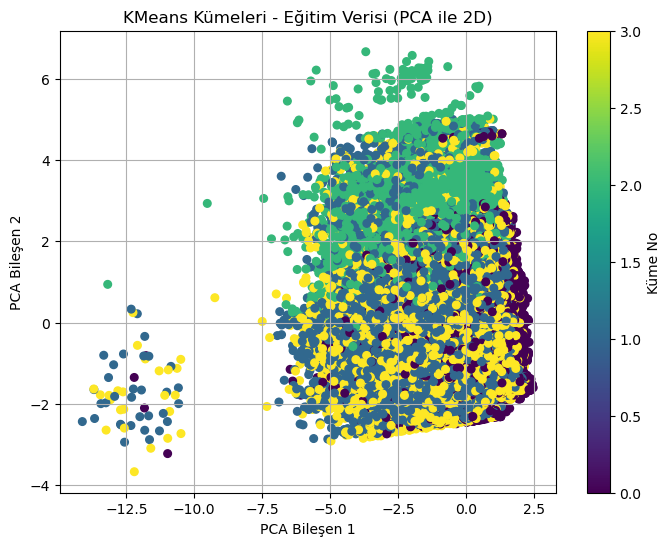

In [28]:


# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Küme renklerine göre scatter plot çiz
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap='viridis', s=30)
plt.title("KMeans Kümeleri - Eğitim Verisi (PCA ile 2D)")
plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.colorbar(label="Küme No")
plt.grid(True)
plt.show()


PCA algoritmasıyla veri 2 boyuta indirildi, böylece görselleştirme mümkün hale geldi.

Her bir nokta bir aracı temsil eder.

Renkler, daha önce KMeans tarafından atanmış küme numaralarını temsil eder (0, 1, 2, 3).

Bu görsel:

Kümelerin birbirinden ne kadar ayrıldığını,

Hangi kümede yoğunluk olduğunu,

Küme sınırlarının nasıl çizilebileceğini görmemizi sağlar.



<a id="22"></a>
## KMeans Model Skoru

In [29]:
# Eğitim verisi için modelin toplam küme içi hata kareler toplamı (inertia)
inertia_score = kmeans.inertia_
print(f"KMeans Inertia Skoru: {inertia_score}")


KMeans Inertia Skoru: 2451241.010615741


inertia_ değeri, her veri noktasının ait olduğu küme merkezine olan uzaklıklarının karelerinin toplamını ifade eder.

Bu skor ne kadar düşükse, kümeler o kadar homojen ve yoğun olur.

Ancak çok düşük inertia değeri aşırı küme sayısına (overfitting) işaret edebilir.
Bu yüzden ideal küme sayısını belirlemek için bir sonraki adımda "Elbow Yöntemi" kullanacağız.

<a id="23"></a>
## Elbow Yöntemi ile En Uygun Küme Sayısının Belirlenmesi

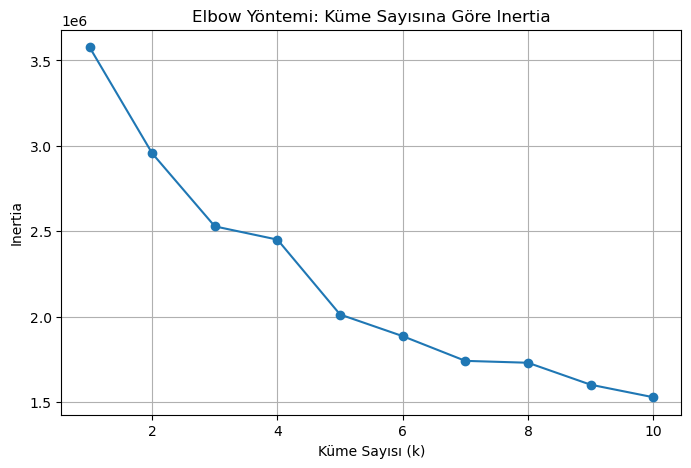

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Farklı küme sayıları için inertia değerlerini tutacak liste
inertias = []
k_values = range(1, 11)  # 1'den 10 kümeye kadar denenecek

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_train)
    inertias.append(kmeans_model.inertia_)

# Elbow grafiğini çiz
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Yöntemi: Küme Sayısına Göre Inertia")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


Grafikte "dirsek" (ani yavaşlama) noktası yaklaşık olarak k = 4 veya k = 5 civarında görünüyor.

Bu, kümelerin fazla detaylandırılmadan ayrıldığı en verimli noktadır.

Fazla küme sayısı, modeli karmaşıklaştırabilir; az küme sayısı ise yetersiz olabilir.

 Bu grafik, n_clusters değerini sezgisel olarak seçmemizi sağlar.
 Seçilen k değeriyle (örneğin 4), önceki adımlarda kurduğumuz KMeans modeli doğrulanmış olur.

<a id="24"></a>
#  Proje Sonuçları ve Genel Değerlendirme

Bu projede araçlara ait veriler hem **gözetimli öğrenme** (Random Forest Regressor) hem de **gözetimsiz öğrenme** (KMeans Clustering) yöntemleriyle analiz edilmiştir. Amaç hem satış fiyatlarını doğru tahmin edebilmek hem de araçları benzer özelliklerine göre anlamlı gruplara ayırmaktır.

---

##  1. Gözetimli Öğrenme – Random Forest Regressor

###  Amaç:
Etiketli veriler kullanılarak (`sellingprice`), araç fiyatlarını tahmin etmek.

###  Kullanılan Yöntemler:
- Model: `RandomForestRegressor`
- Optimizasyon: `GridSearchCV`
- Test/train ayrımı: `train_test_split` (%80 eğitim / %20 test)
- Parametre aralığı:


{
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

En iyi parametreler:


{
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

Performans Ölçütleri:

R² Skoru	0.914
Mean Squared Error	8,149,058.71

 R² skoru %91.4 olup, model satış fiyatlarını oldukça yüksek doğrulukla tahmin edebilmektedir. Hiperparametre optimizasyonu ile daha da iyileştirilmiştir.

## Gözetimsiz Öğrenme – KMeans Clustering
 Amaç:
Etiketsiz veriler ile araçları benzer özelliklerine göre kümelere ayırmak.

 Kullanılan Yöntemler:
Model: KMeans

Küme sayısı: n_clusters=4

Küme içeriği ortalama özelliklerle incelenmiştir.

Görselleştirme için PCA ile 2 boyut indirgeme yapılmıştır.

Kümeleme kalitesi inertia skoru ile değerlendirilmiştir.

### Kümeleme Performansı:
Kümeler (k)	Inertia (Küme içi hata)
1	Yüksek
4	Optimum (dirsek noktası)
10	Aşırı düşük (overfitting riski)

Seçilen k=4 değeri Elbow grafiği ile belirlenmiştir.

Küme içi varyans (inertia) değeri: 2,451,241.01

KMeans ile anlamlı küme ayrımları elde edilmiştir. Bu kümeler; pazarlama, segmentasyon veya anomali tespiti gibi iş senaryolarında kullanılabilir.

#### Gözetimli ve Gözetimsiz Modellerin Karşılaştırması
Kriter	Gözetimli Öğrenme	Gözetimsiz Öğrenme
Model	RandomForestRegressor	KMeans
Amaç	Satış fiyatı tahmini	Benzer araçları gruplama
Etiketli veri	Kullanılır (sellingprice)	Gerekli değil
Performans	R²: 0.914, MSE: 8M+	Inertia: 2.45M
Optimizasyon	GridSearchCV	Elbow yöntemi
Görselleştirme	Gerekli değil	PCA ile yapıldı
Kullanım Alanı	Tahminleme / fiyat politikası	Segmentasyon / pazarlama

#### Genel Yorum ve Öneriler
Random Forest modeli yüksek doğrulukla fiyat tahmini yapmaktadır ve gerçek dünyada uygulanabilir bir yapıdadır.

KMeans algoritması ile yapılan segmentasyon sayesinde araçlar özelliklerine göre anlamlı gruplara ayrılmıştır.

Projede kullanılan her iki yöntem de birbirini destekler niteliktedir:

Tahminsel model ile gelecekteki satış stratejileri belirlenebilir.

Kümeler sayesinde farklı müşteri gruplarına özel kampanyalar hazırlanabilir.

#### Ekstra Öneriler
KMeans küme kalitesi için silhouette_score da eklenebilir.

DBSCAN gibi yoğunluk tabanlı algoritmalar ile karşılaştırma yapılabilir.

Gözetimli kısımda XGBoost, LightGBM gibi alternatif modeller denenebilir.